In [248]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:
gdf = gpd.read_file("PCON_MAY_2024_UK_BFE.shp")

In [4]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PCON24CD   650 non-null    object  
 1   PCON24NM   650 non-null    object  
 2   PCON24NMW  32 non-null     object  
 3   BNG_E      650 non-null    int64   
 4   BNG_N      650 non-null    int64   
 5   LAT        650 non-null    float64 
 6   LONG       650 non-null    float64 
 7   GlobalID   650 non-null    object  
 8   geometry   650 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 45.8+ KB


In [5]:
gdf[gdf.PCON24NMW.notnull()]

,PCON24CD,PCON24NM,PCON24NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
618,W07000081,Aberafan Maesteg,Aberafan Maesteg,281995,189550,51.5924,-3.70491,9feb2f58-b665-4167-98a8-36f5f475c6fd,"POLYGON Z ((279385.399 179048.332 0.000, 27937..."
619,W07000082,Alyn and Deeside,Alun a Glannau Dyfrdwy,332347,365301,53.1805,-3.01375,9508148b-3467-495a-b9a2-09014b9e99da,"POLYGON Z ((324879.298 377193.099 0.000, 32499..."
620,W07000083,Bangor Aberconwy,Bangor Aberconwy,285758,362572,53.1480,-3.70963,92faafae-fda0-477d-b2c2-111834b1d71e,"POLYGON Z ((283252.346 381610.992 0.000, 28325..."
621,W07000084,Blaenau Gwent and Rhymney,Blaenau Gwent a Rhymni,312653,206245,51.7481,-3.26665,1288e496-6020-49cc-a723-a780021c7da3,"POLYGON Z ((320318.097 213680.004 0.000, 32032..."
622,W07000085,"Brecon, Radnor and Cwm Tawe","Aberhonddu, Maesyfed a Chwm-tawe",300889,246522,52.1081,-3.44861,8b5d116c-2093-4528-8463-07c62114f56a,"POLYGON Z ((316452.159 284630.352 0.000, 31644..."
623,W07000086,Bridgend,Pen-y-bont,291030,181514,51.5220,-3.57205,2c03824a-b264-4308-ab9c-5b37a577d8fb,"POLYGON Z ((297277.200 187037.500 0.000, 29727..."
624,W07000087,Caerfyrddin,Caerfyrddin,250837,228760,51.9373,-4.17124,6e80aa31-7cb1-43b9-aaec-34c5c8f138e7,"POLYGON Z ((279771.978 249225.096 0.000, 27982..."
625,W07000088,Caerphilly,Caerffili,315843,191594,51.6169,-3.21692,d4036fd8-bc1e-41b1-88d3-c62dcec0701b,"POLYGON Z ((316317.701 198609.498 0.000, 31633..."
626,W07000089,Cardiff East,Dwyrain Caerdydd,322018,179718,51.5110,-3.12511,530c2199-6543-4310-ba0a-4cbe74a1f33d,"POLYGON Z ((324999.997 178531.095 0.000, 32525..."
627,W07000090,Cardiff North,Gogledd Caerdydd,318603,182294,51.5337,-3.17490,419e0838-9130-4283-8f3f-26b8c0d7ea5c,"POLYGON Z ((312471.602 186347.198 0.000, 31249..."


In [6]:
df = pd.read_csv("2024 Election Data.csv")

In [7]:
constituency_names_1 = list(gdf.PCON24NM)

In [8]:
constituency_names_2 = list(df.constituency)

In [9]:
for constituency in constituency_names_1:
    if constituency not in constituency_names_2:
        print(constituency)

Belfast East
Belfast North
Belfast South and Mid Down
Belfast West
East Antrim
East Londonderry
Fermanagh and South Tyrone
Foyle
Lagan Valley
Mid Ulster
Newry and Armagh
North Antrim
North Down
South Antrim
South Down
Strangford
Upper Bann
West Tyrone


In [10]:
gdf = gdf[gdf.PCON24CD.str[0] != "N"]

In [11]:
gdf.rename(columns={"PCON24NM": "constituency"}, inplace=True)

In [12]:
df.drop(columns=["Unnamed: 23", "Unnamed: 24", "Unnamed: 25", "Unnamed: 26"], inplace=True)

In [13]:
gdf = pd.merge(gdf, df, on="constituency")

In [13]:
gdf.describe()

,BNG_E,BNG_N,LAT,LONG,turnout,con_2019,lab_2019,ld_2019,grn_2019,ref_2019,snp_2019,pc_2019,other_2019
count,632.000000,6.320000e+02,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,431080.104430,3.122579e+05,52.698110,-1.564704,67.473259,22090.223101,16248.498418,5848.778481,1366.643987,1019.922468,1965.791139,242.507911,609.118671
std,98212.486624,1.746661e+05,1.571512,1.451900,5.896164,8983.114026,8187.619205,5447.721959,1653.641208,1669.164233,6361.123449,1555.876519,1993.222066
min,126473.000000,2.641500e+04,50.081400,-6.657220,46.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,362639.250000,1.792368e+05,51.500100,-2.543553,63.900000,14485.750000,9766.250000,2449.000000,720.750000,0.000000,0.000000,0.000000,0.000000
50%,433762.000000,2.805905e+05,52.423100,-1.504185,67.800000,24134.000000,14876.500000,3814.000000,1247.000000,133.500000,0.000000,0.000000,171.500000
75%,514825.000000,4.037035e+05,53.529800,-0.349143,71.600000,29565.000000,21707.500000,7492.250000,1793.750000,1470.000000,0.000000,0.000000,650.500000
max,648544.000000,1.180307e+06,60.505000,1.662590,83.500000,38791.000000,39066.000000,32816.000000,32575.000000,13139.000000,28810.000000,23110.000000,36270.000000


In [14]:
parties = ["con", "lab", "ld", "grn", "ref", "snp", "pc", "other"]
party_2019_cols = [f"{party}_2019" for party in parties]
gdf.loc[:,party_2019_cols]

,con_2019,lab_2019,ld_2019,grn_2019,ref_2019,snp_2019,pc_2019,other_2019
0,29453,11468,9068,1839,334,0,0,0
1,32941,10183,2654,873,334,0,0,336
2,26311,20172,6036,1566,0,0,0,678
3,29118,12227,2875,1389,0,0,0,0
4,35117,9108,11012,2312,0,0,0,556
...,...,...,...,...,...,...,...,...
627,12672,22709,2834,367,3022,0,2595,0
628,14506,18616,2157,966,5742,0,1566,0
629,24535,21969,0,2981,0,0,0,508
630,21933,17994,2013,445,1778,0,2960,0


In [15]:
gdf["2019_winner"] = gdf.loc[:,party_2019_cols].idxmax(axis=1).str.split("_").str[0]

In [16]:
res_2019 = party_2019_cols
res_2019.append("2019_winner")

In [17]:
party_colours = {"con":"#0087DC", "lab":"#E4003B", "ld":"#FAA61A", "grn":"#02A95B", "ref":"#12B6CF", "snp":"#FDF38E", "pc":"#005B54", "other":"#DCDCDC"}

C:\Users\matth\AppData\Local\Temp\ipykernel_6204\1739445945.py:3: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf[gdf["2019_winner"] == party].plot(color=party_colours[party], ax=ax)


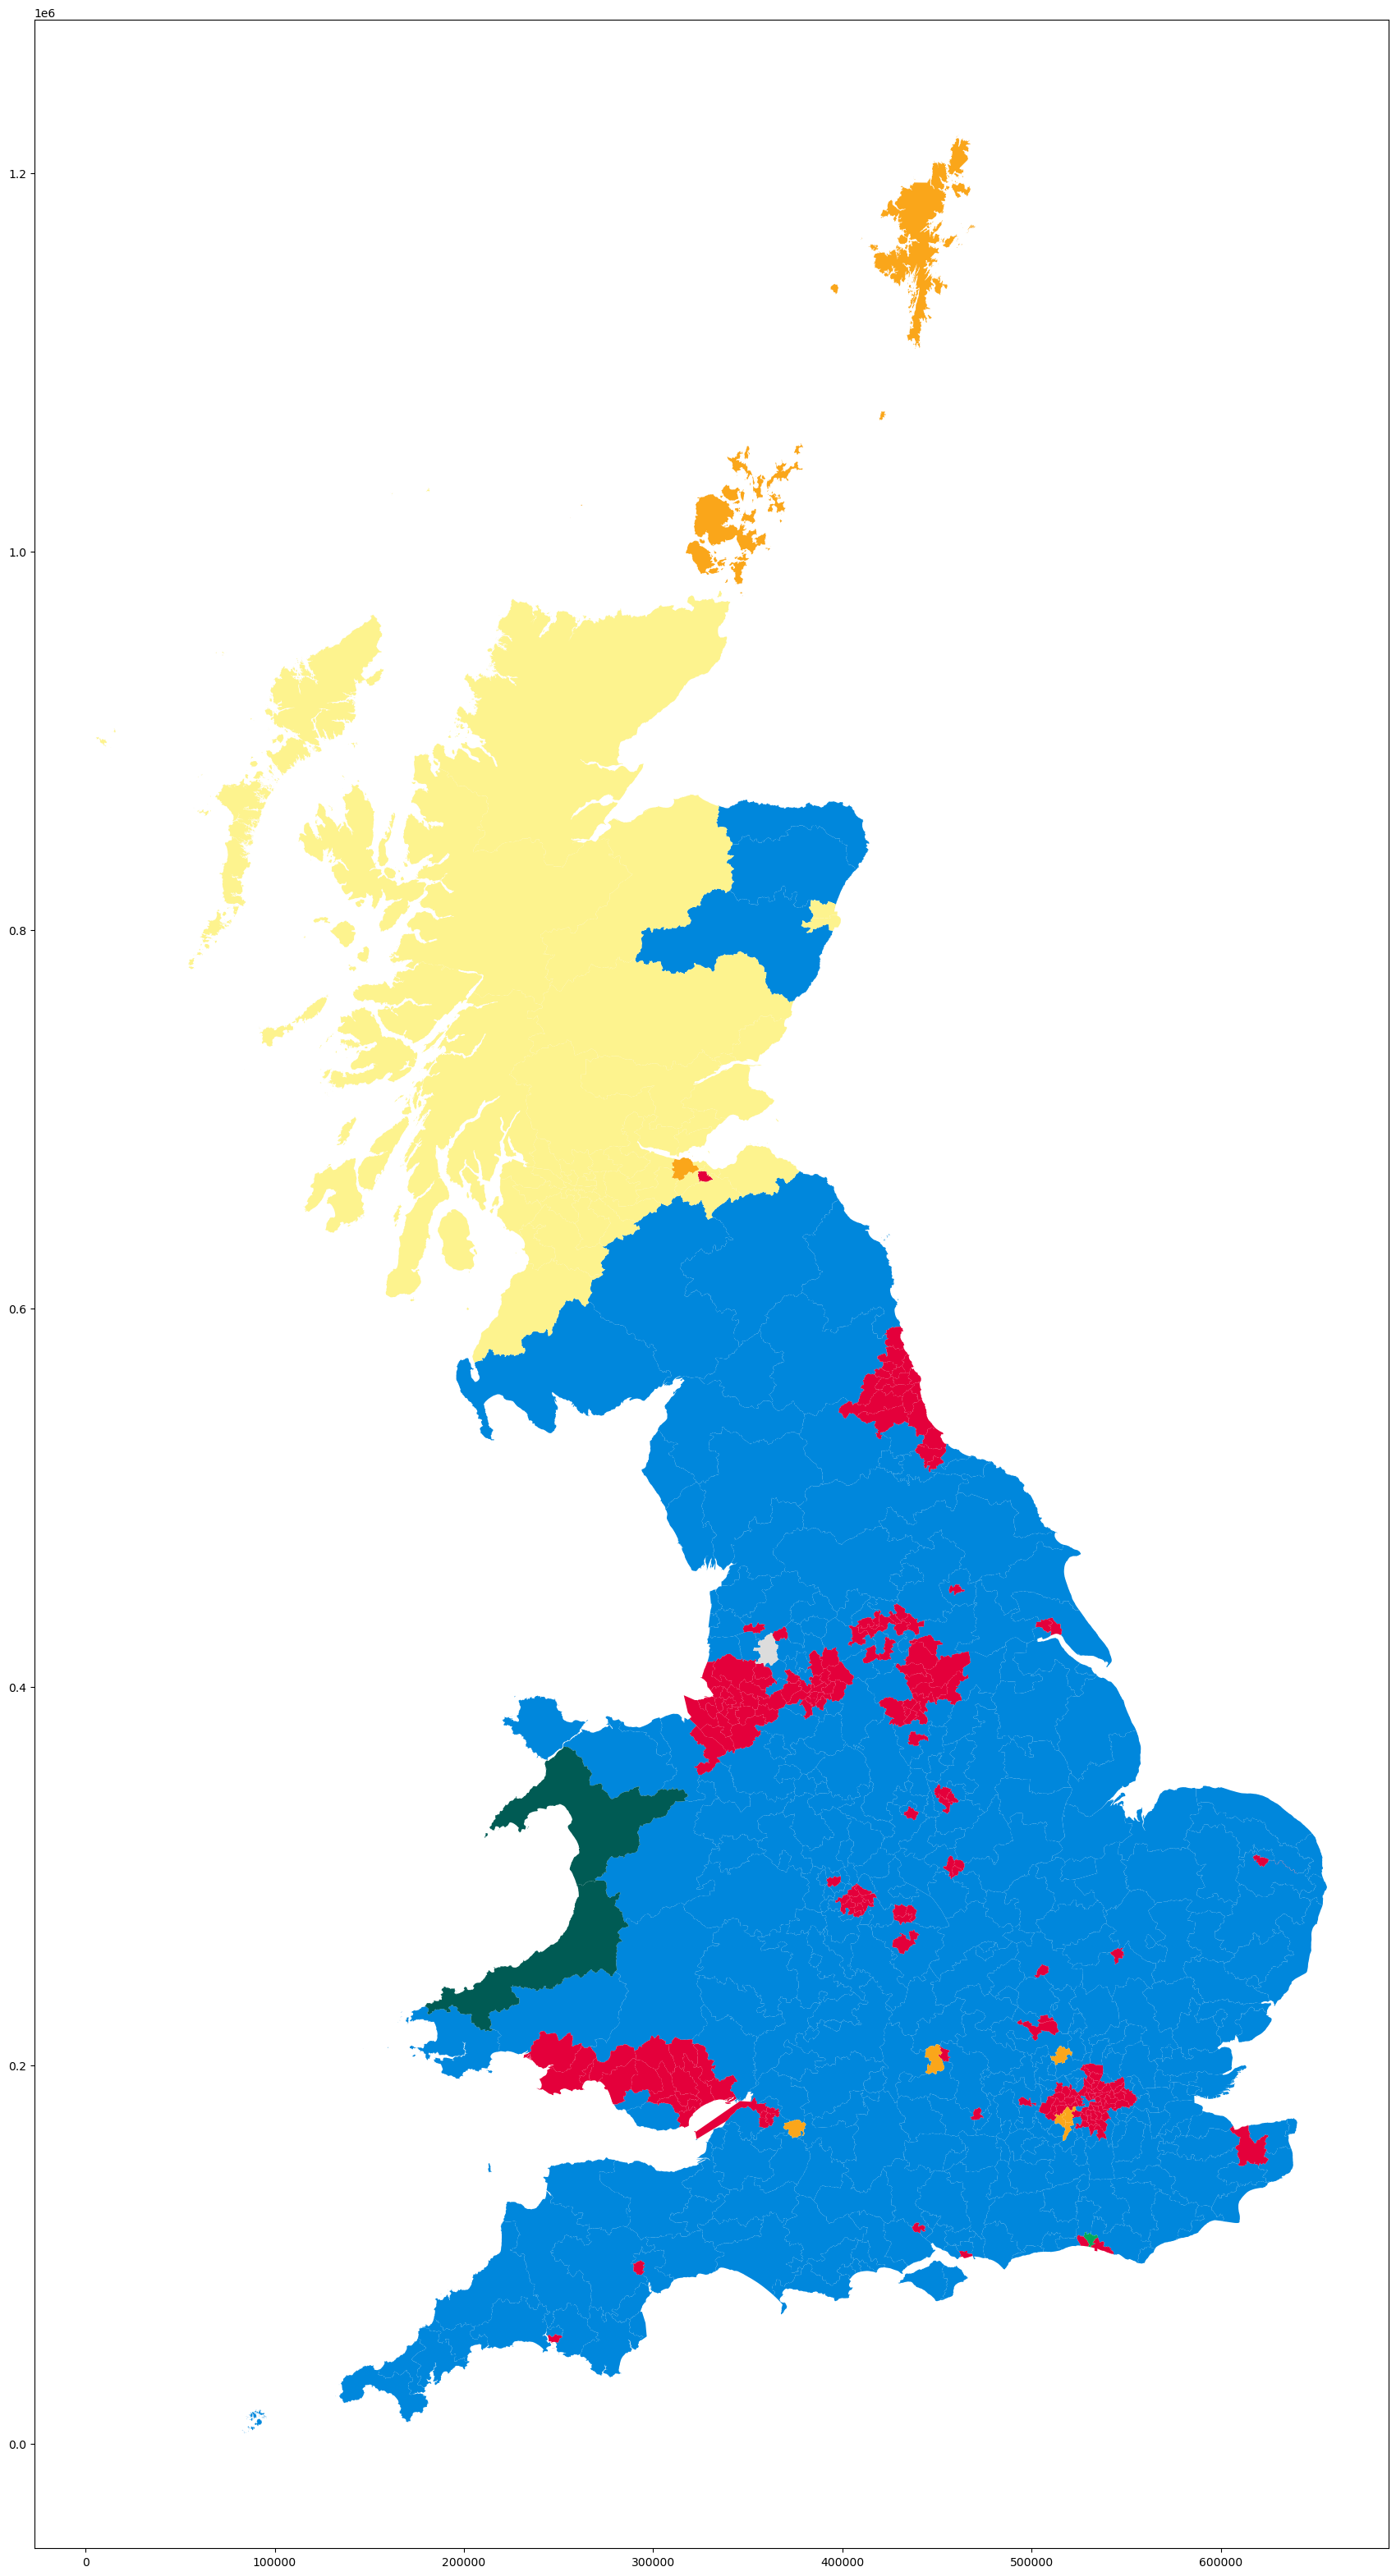

In [18]:
ax = gdf.plot(figsize=(40,40), color="none", edgecolor="none")
for party in parties:
    gdf[gdf["2019_winner"] == party].plot(color=party_colours[party], ax=ax)

In [50]:
cdf = pd.read_csv('2024_candidates.csv')

In [20]:
gdf.drop(columns=['PCON24NMW', 'BNG_E', 'BNG_N', 'GlobalID'], inplace=True)

In [35]:
list(gdf.constituency)

['Aldershot',
 'Aldridge-Brownhills',
 'Altrincham and Sale West',
 'Amber Valley',
 'Arundel and South Downs',
 'Ashfield',
 'Ashford',
 'Ashton-under-Lyne',
 'Aylesbury',
 'Banbury',
 'Barking',
 'Barnsley North',
 'Barnsley South',
 'Barrow and Furness',
 'Basildon and Billericay',
 'Basingstoke',
 'Bassetlaw',
 'Bath',
 'Battersea',
 'Beaconsfield',
 'Beckenham and Penge',
 'Bedford',
 'Bermondsey and Old Southwark',
 'Bethnal Green and Stepney',
 'Beverley and Holderness',
 'Bexhill and Battle',
 'Bexleyheath and Crayford',
 'Bicester and Woodstock',
 'Birkenhead',
 'Birmingham Edgbaston',
 'Birmingham Erdington',
 'Birmingham Hall Green and Moseley',
 'Birmingham Hodge Hill and Solihull North',
 'Birmingham Ladywood',
 'Birmingham Northfield',
 'Birmingham Perry Barr',
 'Birmingham Selly Oak',
 'Birmingham Yardley',
 'Bishop Auckland',
 'Blackburn',
 'Blackley and Middleton South',
 'Blackpool North and Fleetwood',
 'Blackpool South',
 'Blaydon and Consett',
 'Blyth and Ashington

In [51]:
cdf.rename(columns = {"Unnamed: 0": "constituency"}, inplace=True)

In [52]:
cdf = cdf[(cdf["Labour Candidate"].notnull()) | (cdf.constituency == "Chorley")]

In [54]:
for c in list(cdf.constituency):
    if c not in list(gdf.constituency):
        print(c)

In [62]:
gdf_c = list(gdf.constituency)
cdf_c = list(cdf.constituency)

In [65]:
df = pd.merge(gdf, cdf, on="constituency")

In [121]:
england_demographics = pd.read_csv("England_Wales_Demographic_Data.csv")

In [122]:
england_demographics = england_demographics.drop(index=[0,1]).drop(columns=["Unnamed: 10", "Unnamed: 3", "Unnamed: 18", "Unnamed: 25", "Unnamed: 35"]).dropna(axis=0)

In [123]:
england_demographics.head()

,New constituency name,Total population,Number of households,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over,United Kingdom,Ireland,Other Europe,Africa,Middle East and Asia,Americas and the Caribbean,Australasia and others,White British,Other White,Asian / Asian British,Black / Black British,Mixed / Multiple ethnic groups,Other ethnic groups,No religion,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Other religion,Not answered,Owned outright,Owned with a mortgage or loan,Private rented,Social rented,Other tenure
2,Aberafan Maesteg,"92,600","40,800",18.6%,9.6%,12.4%,18.0%,20.9%,20.6%,96.6%,0.3%,1.4%,0.3%,1.1%,0.2%,0.1%,95.3%,1.6%,1.5%,0.2%,1.1%,0.3%,52.5%,40.1%,0.3%,0.3%,0.0%,0.8%,0.1%,0.4%,5.5%,37.0%,27.3%,15.5%,19.9%,0.3%
3,Aldershot,"117,000","46,200",18.5%,10.0%,15.8%,20.8%,18.8%,16.1%,77.8%,0.5%,5.8%,2.2%,12.3%,1.0%,0.4%,73.2%,6.2%,13.3%,2.4%,2.5%,2.5%,38.4%,43.2%,4.2%,5.2%,0.1%,2.2%,0.2%,1.1%,5.4%,27.7%,35.5%,20.0%,15.1%,1.8%
4,Aldridge-Brownhills,"93,600","39,200",17.8%,9.0%,11.5%,17.8%,21.2%,22.8%,93.7%,0.4%,1.5%,0.8%,3.1%,0.4%,0.1%,83.2%,2.2%,8.7%,2.1%,2.4%,1.5%,31.9%,53.6%,0.2%,1.3%,0.0%,2.2%,5.2%,0.5%,5.0%,42.0%,33.2%,10.7%,13.4%,0.7%
5,Altrincham and Sale West,"101,000","40,700",21.3%,8.2%,10.0%,21.9%,19.5%,19.0%,85.4%,1.1%,3.1%,1.6%,7.7%,0.8%,0.3%,75.2%,5.4%,12.1%,1.6%,3.2%,2.5%,31.7%,50.5%,0.5%,3.0%,2.1%,6.4%,0.4%,0.4%,5.0%,37.7%,36.4%,13.8%,11.4%,0.6%
6,Alyn and Deeside,"102,000","43,800",18.2%,9.0%,13.0%,19.1%,20.9%,19.8%,92.2%,0.3%,5.7%,0.5%,1.0%,0.3%,0.1%,91.7%,5.6%,1.1%,0.2%,1.0%,0.4%,41.1%,51.0%,0.3%,0.3%,0.0%,0.6%,0.0%,0.3%,6.6%,36.2%,34.5%,13.8%,15.0%,0.5%


In [124]:
for i in range(3, 36):
    england_demographics.iloc[:,i] = england_demographics.iloc[:,i].str[:-1].astype(float)

In [128]:
scotland_demographics = pd.read_csv("Scotland_Demographic_Data.csv")

In [129]:
scotland_demographics = scotland_demographics.rename(columns={"Unnamed: 0": "New constituency name"}).drop(index=0).drop(columns = ["Unnamed: 2", "Unnamed: 4", "Unnamed: 11", "Unnamed: 19", "Unnamed: 26"])

In [130]:
len(scotland_demographics.columns)

34

In [132]:
for i in range(3, 34):
    scotland_demographics.iloc[:,i] = scotland_demographics.iloc[:,i].str[:-1].astype(float)

In [133]:
scotland_demographics["Christian"] = scotland_demographics["Church of Scotland"] + scotland_demographics["Roman Catholic"] + scotland_demographics["Other Christian"]

In [136]:
scotland_demographics = scotland_demographics.drop(columns=["Church of Scotland", "Roman Catholic", "Other Christian"])

In [138]:
scotland_demographics["Other religion"] += scotland_demographics["Pagan"]

In [140]:
scotland_demographics = scotland_demographics.drop(columns="Pagan")

In [146]:
scotland_demographics = scotland_demographics.rename(columns={"African, Caribbean or Black": "Black / Black British", "Religion not stated": "Not answered"})

In [154]:
demographics = pd.concat([england_demographics, scotland_demographics])

In [158]:
demographics.isnull().sum()

New constituency name              0
Total population                   0
Number of households               0
Aged 15 years and under            0
Aged 16 to 24 years                0
Aged 25 to 34 years                0
Aged 35 to 49 years                0
Aged 50 to 64 years                0
Aged 65 years and over             0
United Kingdom                     0
Ireland                            0
Other Europe                       0
Africa                             0
Middle East and Asia               0
Americas and the Caribbean         0
Australasia and others             0
White British                      0
Other White                        0
Asian / Asian British              0
Black / Black British              0
Mixed / Multiple ethnic groups     0
Other ethnic groups                0
No religion                        0
Christian                          0
Buddhist                           0
Hindu                              0
Jewish                             0
M

In [160]:
for col in ['Owned outright', 'Owned with a mortgage or loan', 'Private rented', 'Social rented', 'Other tenure']:
    demographics[col] = demographics[col].fillna(demographics[col].mean())

In [166]:
demographics["Total population"] = demographics["Total population"].str.replace(",", "").astype(int)
demographics["Number of households"] = demographics["Number of households"].str.replace(",", "").astype(int)

In [185]:
demographics["Ireland"] = demographics["Ireland"].astype(float)

In [186]:
for i in range(3, 36):
    demographics.iloc[:,i] = demographics.iloc[:,i].astype(float)

In [188]:
demographics.to_csv("demographics.csv")

In [191]:
demographics.rename(columns={'New constituency name': 'constituency'}, inplace=True)

In [223]:
for c in list(df["constituency"]):
    if c not in list(demographics.constituency):
        print(c)

In [197]:
demographics = pd.read_csv("demographics.csv")

In [222]:
df.iloc[631,1] = "Ynys Mon"

In [213]:
demographics = demographics.drop(columns=["Unnamed: 0"])

In [216]:
demographics = demographics.rename(columns={"New constituency name": "constituency"})

In [239]:
pd.merge(df, demographics, on="constituency").to_file("Full Constituency Data.geojson", driver="GeoJSON")

In [245]:
df2 = pd.merge(df, demographics, on="constituency")

In [251]:
df2.columns

Index(['PCON24CD', 'constituency', 'LAT', 'LONG', 'geometry', 'region',
       'country', '2019_winner', '2019_majority', 'turnout', 'con_2019',
       'con_%_2019', 'lab_2019', 'lab_%_2019', 'ld_2019', 'ld_%_2019',
       'grn_2019', 'grn_%_2019', 'ref_2019', 'ref_2019_%', 'snp_2019',
       'snp_2019_%', 'pc_2019', 'pc_2019_%', 'other_2019', 'other_2019_%',
       '2019_total', 'Conservative Candidate', 'Labour Candidate',
       'Lib Dem Candidate', 'Reform UK Candidate', 'Green Candidate',
       'SNP Candidate', 'Plaid Cymru Candidate', 'Other Candidates',
       'Total population', 'Number of households', 'Aged 15 years and under',
       'Aged 16 to 24 years', 'Aged 25 to 34 years', 'Aged 35 to 49 years',
       'Aged 50 to 64 years', 'Aged 65 years and over', 'United Kingdom',
       'Ireland', 'Other Europe', 'Africa', 'Middle East and Asia',
       'Americas and the Caribbean', 'Australasia and others', 'White British',
       'Other White', 'Asian / Asian British', 'Black / 

In [316]:
col = "con_%_2019"
df2.sort_values(by=col, ascending=False)[["constituency", col]].head(50)

,constituency,con_%_2019
91,Castle Point,77
424,South Holland and The Deepings,76
51,Boston and Skegness,76
327,North East Cambridgeshire,74
253,Kingswinford and South Staffordshire,74
374,Rayleigh and Wickford,73
111,Clacton,72
280,Louth and Horncastle,72
65,Brigg and Immingham,72
288,Maldon,72


In [317]:
df2.to_file("Full Constituency Data.gpkg")

In [319]:
df3 = gpd.read_file("Full Constituency Data.gpkg")